In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
# Load the user information dataset 
user_data = pd.read_csv('user_info.csv')

# Load the calorie information dataset
calorie_data = pd.read_csv('calories.csv')

In [3]:
user_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calorie_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
# Merge the datasets based on the User_ID column
data = pd.merge(user_data, calorie_data, on='User_ID')

In [6]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
num_rows = len(data)

# Get the number of columns using len() on the column index
num_columns = len(data.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 15000
Number of columns: 9


In [8]:
# Drop rows with null values
data = data.dropna()

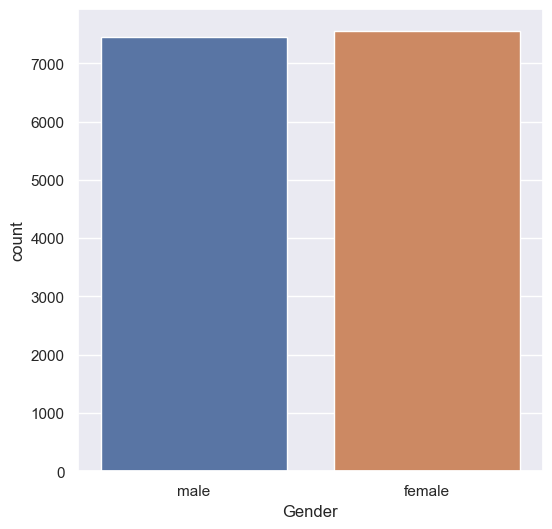

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

In [10]:
# Drop irrelevant columns (e.g., User_ID)
data = data.drop('User_ID', axis=1)

<Axes: >

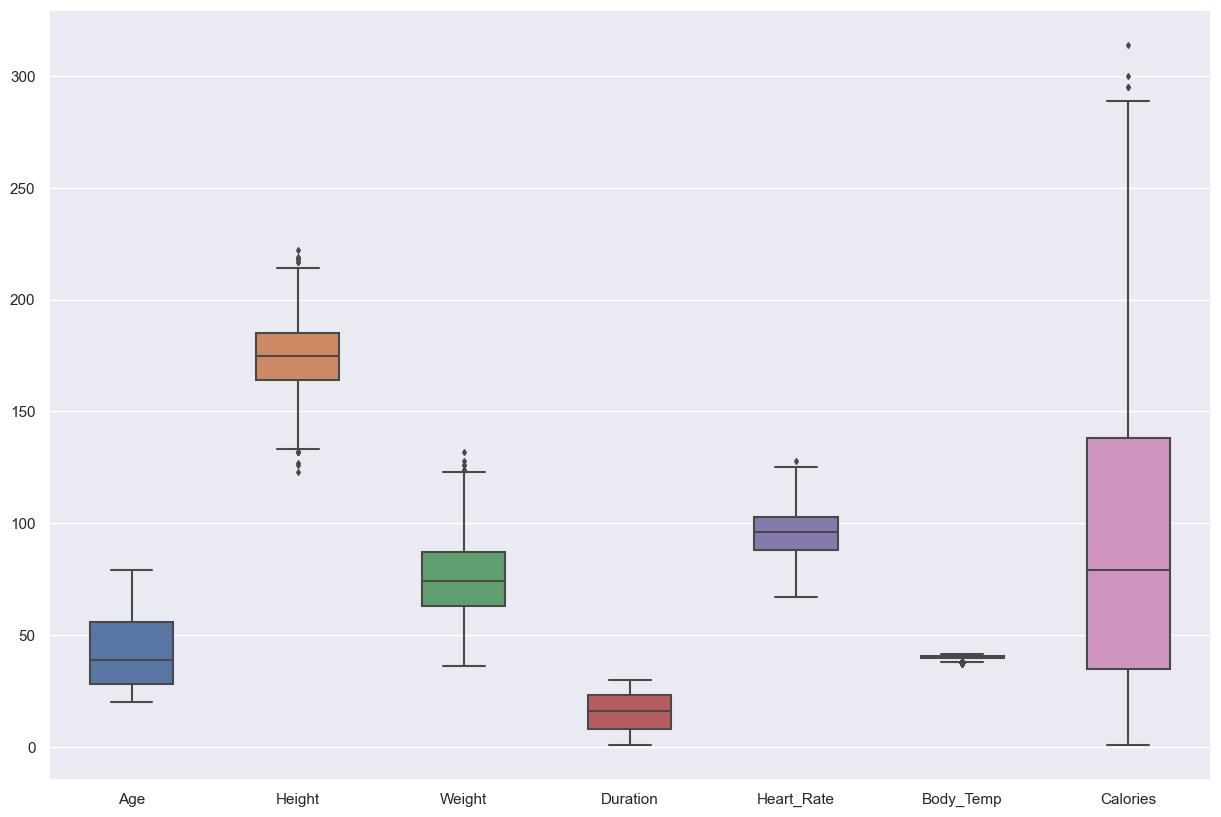

In [11]:
#outliers
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

In [12]:
# Split the dataset into features (X) and target variable (y)
X = data[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = data['Calories']

In [13]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

C:\Users\mudip\AppData\Local\Temp\ipykernel_30672\2721508265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


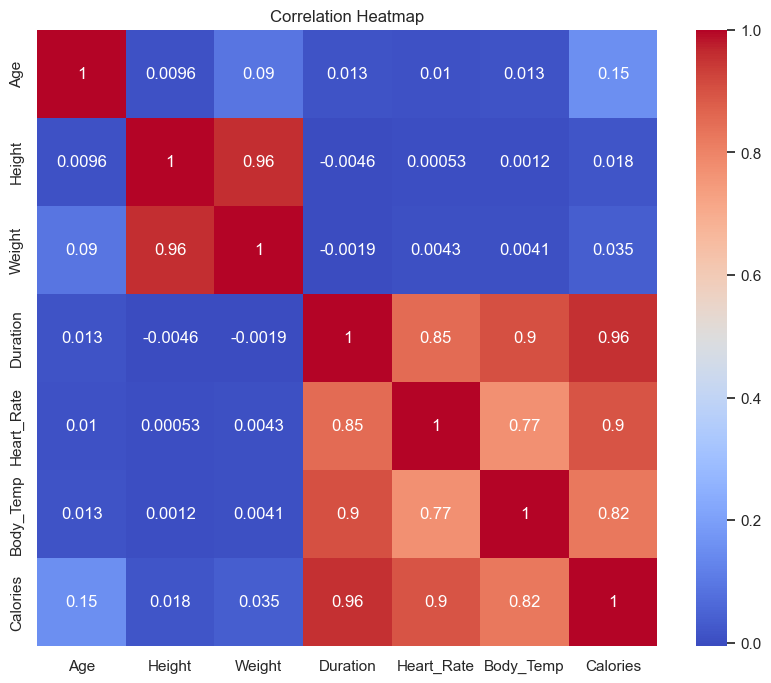

In [14]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

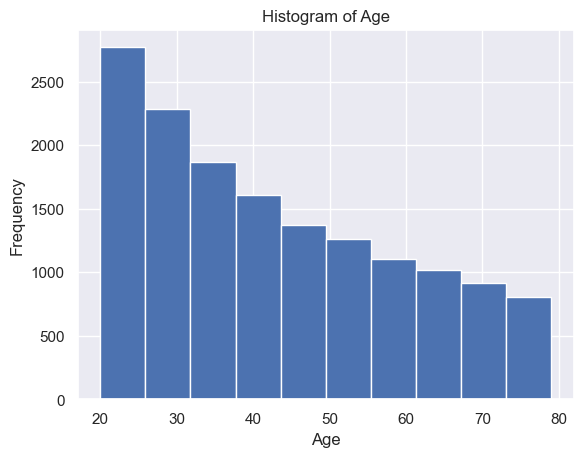

In [15]:
# Plot histogram of Age
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create the individual models
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgb = XGBRegressor()
linear_regression = LinearRegression()
svm_model = SVR()

In [18]:
# Train the individual models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linear_regression.fit(X_train, y_train)
svm_model.fit(X_train, y_train)



SVR()

In [19]:
# Make predictions on the testing data using each model
dt_pred = decision_tree.predict(X_test)
rf_pred = random_forest.predict(X_test)
xgb_pred = xgb.predict(X_test)
lin_pred = linear_regression.predict(X_test)
svm_pred = svm_model.predict(X_test)

In [20]:
#Decision Tree

# Evaluate the ensemble model
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test, dt_pred)
rmse = mean_squared_error(y_test, dt_pred, squared=False)
r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree Mean Absolute Error: {mae}")
print(f"Decision Tree Mean Squared Error: {mse}")
print(f"Decision Tree Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


#Random forest
# Evaluate the ensemble model
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)
r2 = r2_score(y_test, rf_pred)

print(f"Random forest Mean Absolute Error: {mae}")
print(f"Random forest Mean Squared Error: {mse}")
print(f"Random forest Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


#XGB
# Evaluate the ensemble model
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = mean_squared_error(y_test, xgb_pred, squared=False)
r2 = r2_score(y_test, xgb_pred)

print(f"XGB Mean Absolute Error: {mae}")
print(f"XGB Mean Squared Error: {mse}")
print(f"XGB Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


#Linear Regression
# Evaluate the ensemble model
mae = mean_absolute_error(y_test, lin_pred)
mse = mean_squared_error(y_test, lin_pred)
rmse = mean_squared_error(y_test, lin_pred, squared=False)
r2 = r2_score(y_test, lin_pred)

print(f"Linear reg  Mean Absolute Error: {mae}")
print(f"Linear reg  Mean Squared Error: {mse}")
print(f"Linear reg  Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


#SVM
# Evaluate the ensemble model
mae = mean_absolute_error(y_test, svm_pred)
mse = mean_squared_error(y_test, svm_pred)
rmse = mean_squared_error(y_test, svm_pred, squared=False)
r2 = r2_score(y_test, svm_pred)

print(f"SVM Mean Absolute Error: {mae}")
print(f"SVM Mean Squared Error: {mse}")
print(f"SVM Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Decision Tree Mean Absolute Error: 3.461
Decision Tree Mean Squared Error: 28.459666666666667
Decision Tree Root Mean Squared Error: 5.334760225789597
R-squared: 0.992948182078656
Random forest Mean Absolute Error: 1.6988400000000001
Random forest Mean Squared Error: 7.102087133333335
Random forest Root Mean Squared Error: 2.6649741337081183
R-squared: 0.9982402244582701
XGB Mean Absolute Error: 1.5154637812376022
XGB Mean Squared Error: 4.9991024368512775
XGB Root Mean Squared Error: 2.235867267270416
R-squared: 0.9987613080445488
Linear reg  Mean Absolute Error: 8.441513553849703
Linear reg  Mean Squared Error: 131.99574575081704
Linear reg  Root Mean Squared Error: 11.488940149152882
R-squared: 0.9672937151257295
SVM Mean Absolute Error: 11.630882986497275
SVM Mean Squared Error: 288.47910769006285
SVM Root Mean Squared Error: 16.98467272837669
R-squared: 0.9285198184023431


In [21]:
#create a stack

stacked_X = np.column_stack((dt_pred,rf_pred,xgb_pred))

# Create the meta-model (linear regression in this example) and train it
meta_model = LinearRegression()
meta_model.fit(stacked_X, y_test)

# Generate the combined predictions using the meta-model
stacked_pred = meta_model.predict(stacked_X)



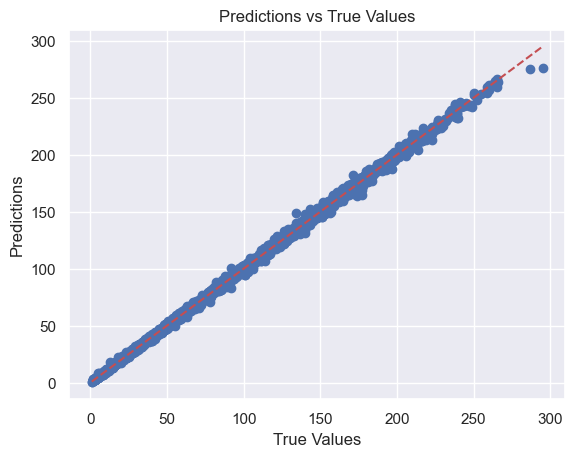

In [22]:
# Generate the combined predictions using the meta-model
stacked_pred = meta_model.predict(stacked_X)

# Plot the predictions against the true values
plt.scatter(y_test, stacked_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Plotting the diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.show()

In [23]:
# Evaluate the ensemble model
mae = mean_absolute_error(y_test, stacked_pred)
mse = mean_squared_error(y_test, stacked_pred)
rmse = mean_squared_error(y_test, stacked_pred, squared=False)
r2 = r2_score(y_test, stacked_pred)

print(f"Stacked Model Mean Absolute Error: {mae}")
print(f"Stacked Model Mean Squared Error: {mse}")
print(f"Stacked Model Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Stacked Model Mean Absolute Error: 1.2920202130172755
Stacked Model Mean Squared Error: 3.7224529132316495
Stacked Model Root Mean Squared Error: 1.9293659355424646
R-squared: 0.9990776399290849
